In [1]:
# We're going to start off in a jupyter notebook and slowly move this into a widget... for visualization with tests and stuff
%matplotlib notebook
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyvista as pv

In [2]:
data = sio.loadmat('/N/project/berkeley_walking/BerkeleyData/berkeley_pupilShadowMesh/s3_7_pupilShadowMesh.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'allPoints', 'cens', 'closestActualIndexDist', 'closestPrefIndexDist', 'eyeVec', 'fixBool', 'fixationList', 'frame_prefStepNum_XYZ', 'gazeXYZ', 'markerNames', 'shadow', 'step_plantfoot_xyz', 'y_flip', 'z_flip'])

In [3]:
environment_mesh = data['allPoints'] 
print(environment_mesh.shape) # num. of points x XYZ coordinates
skeleton = data['shadow'] # num of frames x num of pose landmarks x XYZ coordinates
print(skeleton.shape)
footholds = data['step_plantfoot_xyz']
print(footholds.shape) # num of steps x [step #, foot that's down , XYZ coordinates]
gazeGround = data['gazeXYZ']
print(gazeGround.shape) # num of frames x XYZ coordinates;  it's where the gaze intersects the ground

(546424, 3)
(464, 30, 3)
(28, 5)
(464, 3)


<IPython.core.display.Javascript object>


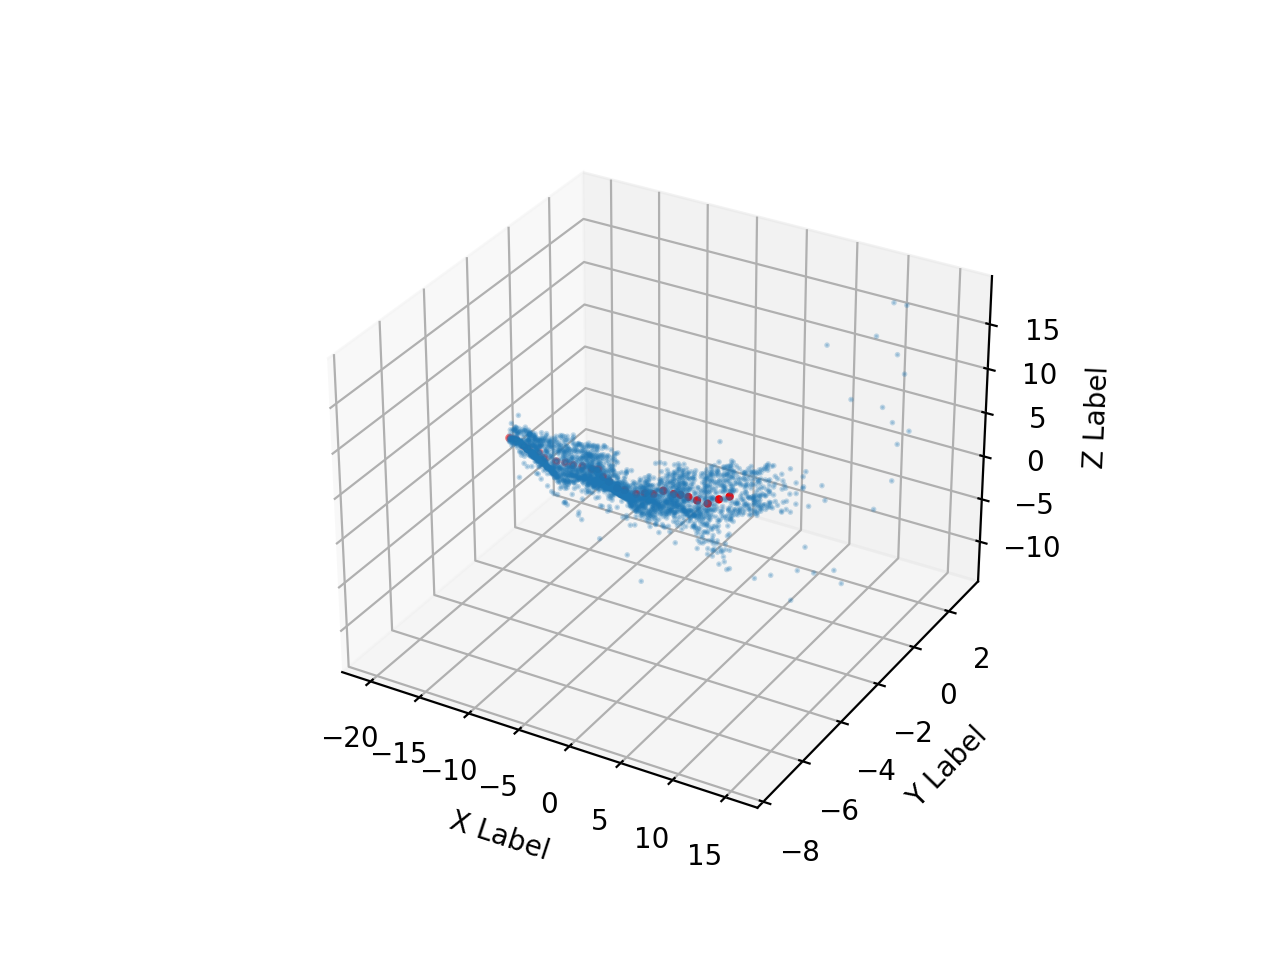

In [4]:
# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the point cloud data
ax.scatter(environment_mesh[::200,0],environment_mesh[::200,1], environment_mesh[::200,2], s=1,alpha=.25)
ax.scatter(footholds[:,2],footholds[:,3],footholds[:,4],s=4,c='r')

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

In [12]:
# try to create a mesh
# points is a 3D numpy array (n_points, 3) coordinates of a sphere
cloud = pv.PolyData(environment_mesh)
# environment_mesh
# cloud.plot()

# volume = cloud.delaunay_3d(alpha=2.)
# shell = volume.extract_geometry()
# shell.plot()

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations